Hola **Daniel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

**Tip**: Para darle una mejor presentación y órden al notebook trata de siempre al inicio del mismo en una celda markdown dejar también una breve introducción al mismo para que sea claro lo que se realizará desde un inicio
</div>

# Showz Análisis de enero 2017 a diciembre 2018 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carga los datasets
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# Veamos las primeras filas para conocer las columnas
print("Visits head:")
print(visits.head())
print("\nOrders head:")
print(orders.head())
print("\nCosts head:")
print(costs.head())

# Optimización básica de tipos
# Primero, chequeamos las columnas y sus tipos
print("\nVisits info:")
print(visits.info())
print("\nOrders info:")
print(orders.info())
print("\nCosts info:")
print(costs.info())

Visits head:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

Orders head:
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

Costs head:
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1 

In [3]:
# Conversión correcta de columnas fecha
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Confirmar cambios
print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entri

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el análisis inicial de tus dataset, siempre es importante primero revisar la calidad de los datos y el tipo de los mismos antes de pasar a cualquier análisis
</div>

### Cuántas personas usan el servicio cada día, semana y mes?

In [4]:
# Cantidad de usuarios únicos por día
users_per_day = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique().reset_index()
users_per_day.columns = ['date', 'unique_users']

# Cantidad de usuarios únicos por semana
users_per_week = visits.groupby(visits['Start Ts'].dt.to_period('W'))['Uid'].nunique().reset_index()
users_per_week.columns = ['week', 'unique_users']

# Cantidad de usuarios únicos por mes
users_per_month = visits.groupby(visits['Start Ts'].dt.to_period('M'))['Uid'].nunique().reset_index()
users_per_month.columns = ['month', 'unique_users']

# Mostrar ejemplos
print("Usuarios únicos por día:")
print(users_per_day.head())

print("\nUsuarios únicos por semana:")
print(users_per_week.head())

print("\nUsuarios únicos por mes:")
print(users_per_month.head())

Usuarios únicos por día:
         date  unique_users
0  2017-06-01           605
1  2017-06-02           608
2  2017-06-03           445
3  2017-06-04           476
4  2017-06-05           820

Usuarios únicos por semana:
                    week  unique_users
0  2017-05-29/2017-06-04          2021
1  2017-06-05/2017-06-11          4129
2  2017-06-12/2017-06-18          2812
3  2017-06-19/2017-06-25          2878
4  2017-06-26/2017-07-02          3064

Usuarios únicos por mes:
     month  unique_users
0  2017-06         13259
1  2017-07         14183
2  2017-08         11631
3  2017-09         18975
4  2017-10         29692


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cálculos realizados! Pero si te fijas al utilizar sólo `.head()` estarías mostrando una parte de los resultados lo cual puede sesgar el análisis, cuando tengas este tipo de datos con fechas lo mejor es presentarlo con una gráfica de líneas para que la revisión sea más visual y así puedes utilizar todos los datos\
</div>

### Cúantas sesiones hay por día? 

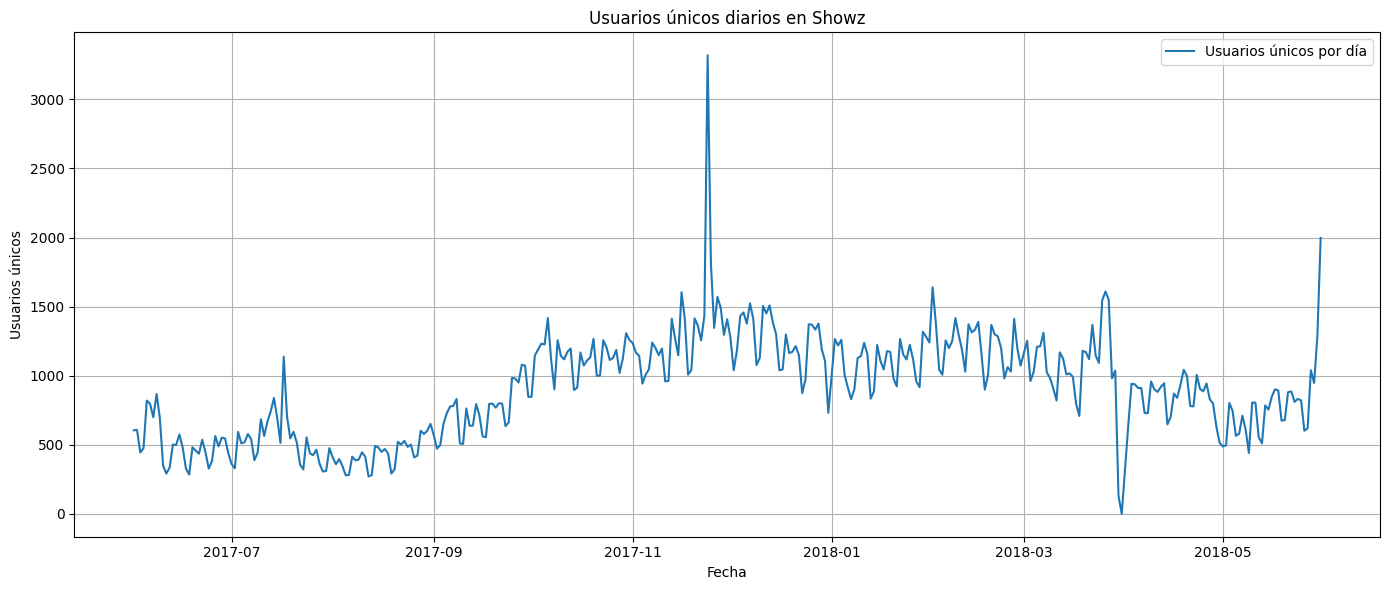

In [6]:
# Gráfico línea usuarios únicos por día
plt.figure(figsize=(14,6))
plt.plot(users_per_day['date'], users_per_day['unique_users'], label='Usuarios únicos por día')
plt.title('Usuarios únicos diarios en Showz')
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show() 

In [27]:
# Contar sesiones por día
sessions_per_day = visits.groupby(visits['Start Ts'].dt.date).size().reset_index(name='session_count')

print("Sesiones por día:")
print(sessions_per_day.head())

Sesiones por día:
     Start Ts  session_count
0  2017-06-01            664
1  2017-06-02            658
2  2017-06-03            477
3  2017-06-04            510
4  2017-06-05            893


Este conteo de sesiones por día nos muestra cuántas veces la gente entró a la página cada día. Esto no es lo mismo que usuarios únicos porque alguien puede entrar varias veces y cada entrada cuenta.
Si ves ese gran alza justo entre noviembre de 2017 y enero de 2018, probablemente fue porque Showz hizo promociones o eventos especiales como Black Friday o Navidad, o tal vez lanzaron alguna campaña de marketing que llamó mucho la atención. También puede ser temporada alta de eventos y por eso la gente estuvo más activa.
Ese pico está genial porque significa que lograron atraer mucho más tráfico, pero luego habría que ver si esa gente siguió regresando o solo fue un subidón puntual

In [15]:
print(visits['Start Ts'].dtype)
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
sessions_per_day = visits.groupby(visits['Start Ts'].dt.date).size().reset_index(name='session_count')
print(sessions_per_day.head())

datetime64[ns]
     Start Ts  session_count
0  2017-06-01            664
1  2017-06-02            658
2  2017-06-03            477
3  2017-06-04            510
4  2017-06-05            893


## Cúal es la duración de cada sesión? 

In [19]:
print(type(visits['Start Ts'].iloc[0]))
print(type(visits['End Ts'].iloc[0]))
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], errors='coerce')
visits['End Ts'] = pd.to_datetime(visits['End Ts'], errors='coerce')

visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()
visits['session_duration'] = visits.apply(lambda row: (row['End Ts'] - row['Start Ts']).total_seconds(), axis=1)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
# Aseguramos el tipo datetime
visits['Start Ts'] = visits['Start Ts'].astype('datetime64[ns]')
visits['End Ts'] = visits['End Ts'].astype('datetime64[ns]')

# Ahora calculamos la duración
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()

print(visits['session_duration'].describe())

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration, dtype: float64


In [21]:
# Eliminamos o corregimos las sesiones con duración negativa
visits = visits[visits['session_duration'] >= 0]

# Recalcular estadísticas después de limpiar
print(visits['session_duration'].describe()) 

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration, dtype: float64


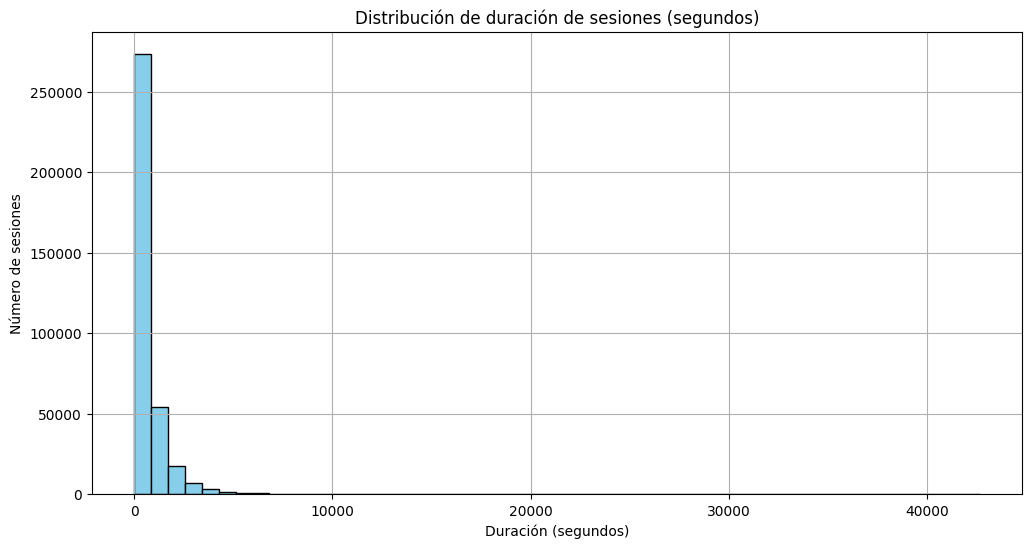

In [22]:
plt.figure(figsize=(12,6))
plt.hist(visits['session_duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de duración de sesiones (segundos)')
plt.xlabel('Duración (segundos)')
plt.ylabel('Número de sesiones')
plt.grid(True)
plt.show() 

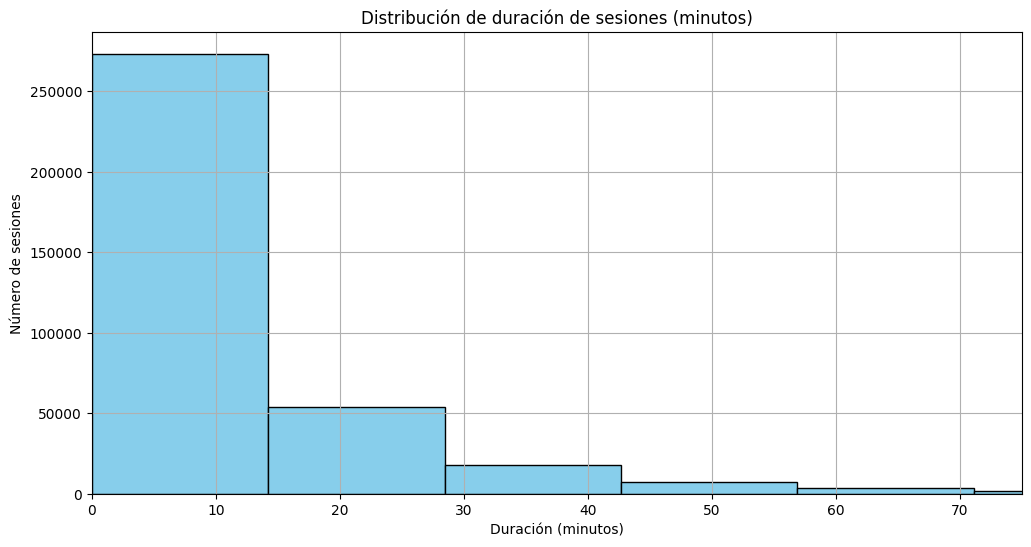

In [23]:
# Convertir duración a minutos
visits['session_duration_min'] = visits['session_duration'] / 60

# Graficar histograma en minutos
plt.figure(figsize=(12,6))
plt.hist(visits['session_duration_min'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de duración de sesiones (minutos)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Número de sesiones')
plt.grid(True)
plt.xlim(0, visits['session_duration_min'].quantile(0.99))  # Limitar eje x al percentil 99 para evitar valores extremos
plt.show() 

Con esto podemos podemos concluir que la mayoría de sesiones aproximadamente de 275,000 está entre 13-15 min,los usuarios que son aproximadamente 55,000 con una duración de 15-28 min y los que sigue se hacen muchísimo menor el número de sesiones. 

## Con que frecuencia los usuarios regresan? 

In [28]:
# Ordenar por usuario y fecha de inicio
visits_sorted = visits.sort_values(by=['Uid', 'Start Ts'])

# Calcular días desde la última visita para cada usuario
visits_sorted['days_since_last_visit'] = visits_sorted.groupby('Uid')['Start Ts'].diff().dt.total_seconds() / (60*60*24)

# Estadísticas básicas de esta diferencia
print(visits_sorted['days_since_last_visit'].describe())

# Mostrar algunos ejemplos
print(visits_sorted[['Uid', 'Start Ts', 'days_since_last_visit']].head(10)) 

count    131229.000000
mean         28.110622
std          49.729004
min           0.000000
25%           0.678472
50%           4.905556
75%          31.964583
max         362.540278
Name: days_since_last_visit, dtype: float64
                    Uid            Start Ts  days_since_last_visit
196543   11863502262781 2018-03-01 17:27:00                    NaN
257333   49537067089222 2018-02-06 15:55:00                    NaN
173818  297729379853735 2017-06-07 18:47:00                    NaN
173142  313578113262317 2017-09-18 22:49:00                    NaN
192554  313578113262317 2018-02-18 15:17:00             152.686111
113873  313578113262317 2018-03-11 17:23:00              21.087500
34588   325320750514679 2017-09-30 14:29:00                    NaN
41778   325320750514679 2018-02-26 12:33:00             148.919444
188450  397399764396656 2018-01-18 12:32:00                    NaN
183750  407573351275847 2017-06-17 13:40:00                    NaN


Podemos ver con esto que el conteo es de 131,229 que son las diferencias entre visitas para usuarios con más de una sesión. Una media de aproximadamente 28 días de que usa y vuelve a la plataforma lo que es casi un mes, un valor standard alto que se puede interpretar que hay mumcha variabilidad algunos regresan mucho más rapido que otros. Un valor minimo de 0 que podría interpretarse que pueden regresar el mismo día; cada percentil igual representa respecto a cada día vemos que en el primer cuartil está en 0.67 lo que refleja que está de regreso cada 16 horas aproximadamente que el 50% está que regresa cada 4.9 días y del 75% que en 31.96 días que sería casi casi cada 32 días y el máximo de que tarda un cliente es cada 362.5 días lo que podría contarse como casi casi un año. Los datos que existen como NaN aparece porque sería su primer visita o de plano no regresaron a ocupar la plataforma. 

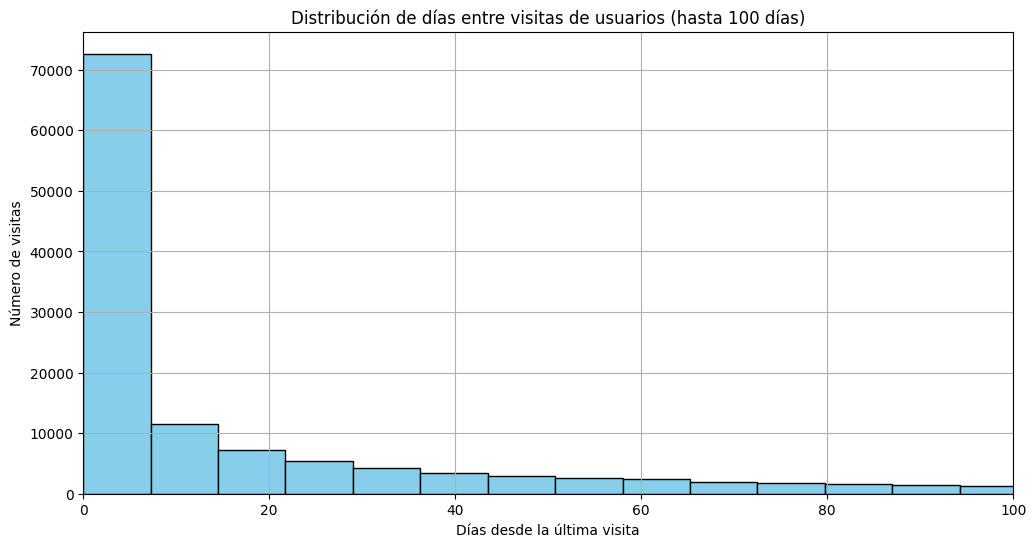

In [31]:
plt.figure(figsize=(12,6))
plt.hist(valid_days, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de días entre visitas de usuarios (hasta 100 días)')
plt.xlabel('Días desde la última visita')
plt.ylabel('Número de visitas')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Esta última sección te apoyaste muy bien de las gráficas para complementar mejor el mensaje que se quiere compartir en el análisis.

Lo que haría falta un poco para que el proceso de análisis sea más claro es que cada que se muestre una gráfica se redacte también la interpretación de la misma para que sea claro el mensaje que se quiere comunicar.
</div>

## Ventas 

In [34]:
# Asegúrate de que las fechas estén en formato datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [35]:
# Obtener el primer registro (fecha de inicio) por usuario
registration = visits.groupby('Uid')['Start Ts'].min().reset_index()

# Obtener la primera compra por usuario
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index()

# Unir ambas tablas para tener registro + primera compra
conversion = pd.merge(registration, first_order, on='Uid', how='inner')

# Calcular los días entre registro y primera compra
conversion['conversion_time'] = (conversion['Buy Ts'] - conversion['Start Ts']).dt.days

# Agrupar por días de conversión para ver el patrón
conversion_distribution = conversion['conversion_time'].value_counts().sort_index()

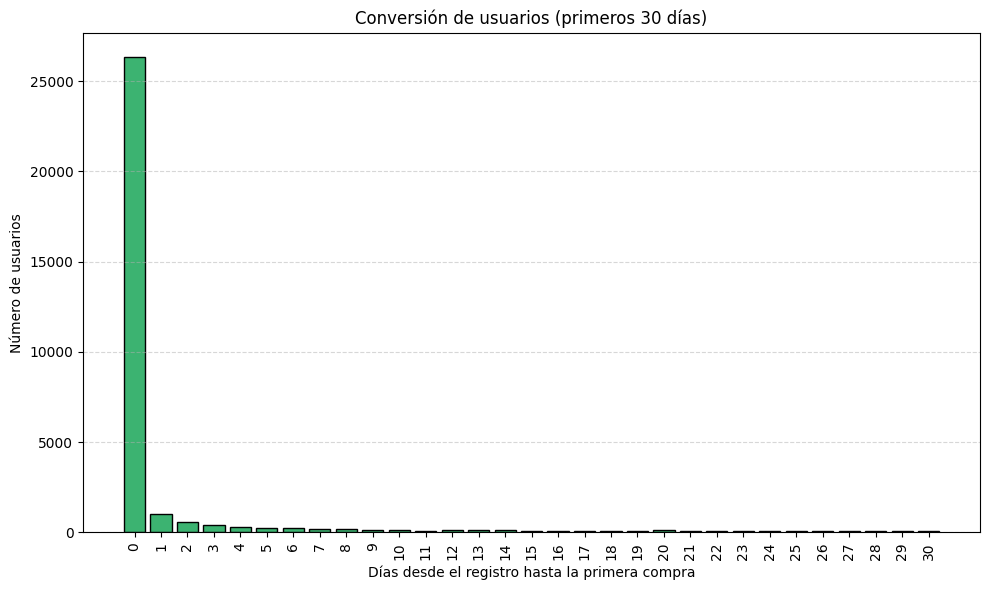

In [40]:
plt.figure(figsize=(10,6))

# Filtramos los primeros 30 días para enfocarnos en los patrones comunes
filtered = conversion_distribution[conversion_distribution.index <= 30]

plt.bar(filtered.index, filtered.values, color='mediumseagreen', edgecolor='black')
plt.xlabel('Días desde el registro hasta la primera compra')
plt.ylabel('Número de usuarios')
plt.title('Conversión de usuarios (primeros 30 días)')
plt.xticks(range(0, 31, 1), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Este gráfico nos dice que la mayoría de los usuarios que terminan comprando lo hacen dentro de la primera semana, sobre todo en los primeros días después de registrarse. Después de eso, las conversiones caen bastante. Así que si queremos mejorar las ventas, lo ideal sería enfocar los esfuerzos de marketing o recordatorios en esos primeros días.

## Cuántos pedidos hacen durante un periodo de tiempo dado?

In [42]:
# Agrupar por usuario y contar la cantidad de pedidos
orders_per_user = orders.groupby('Uid').size().reset_index(name='order_count')

# Ver algunos ejemplos
print(orders_per_user.head()) 
# Estadísticas básicas del número de pedidos por usuario
print(orders_per_user['order_count'].describe())

                Uid  order_count
0   313578113262317            1
1  1575281904278712            2
2  2429014661409475            1
3  2464366381792757            1
4  2551852515556206            2
count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: order_count, dtype: float64


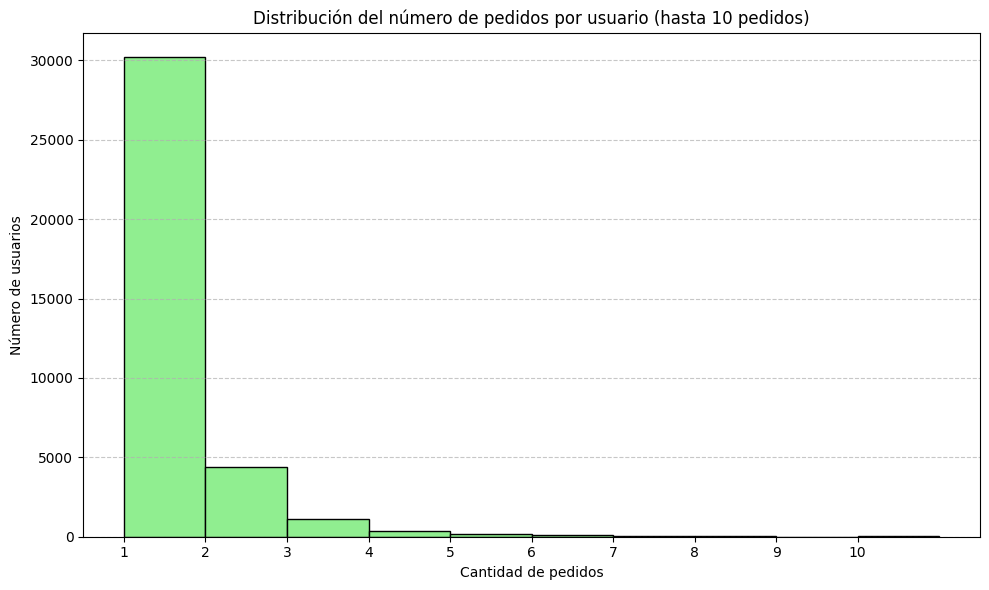

In [44]:
plt.figure(figsize=(10,6))

# Filtramos para mostrar usuarios con hasta 10 pedidos
filtered_orders = orders_per_user[orders_per_user['order_count'] <= 10]

plt.hist(filtered_orders['order_count'], bins=range(1, 12), edgecolor='black', color='lightgreen')
plt.title('Distribución del número de pedidos por usuario (hasta 10 pedidos)')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Número de usuarios')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
total_users = orders_per_user.shape[0]
one_time_users = orders_per_user[orders_per_user['order_count'] == 1].shape[0]
repeat_users = total_users - one_time_users

print(f"Usuarios que hicieron solo 1 pedido: {one_time_users} ({one_time_users/total_users:.1%})")
print(f"Usuarios que repitieron pedidos: {repeat_users} ({repeat_users/total_users:.1%})") 

Usuarios que hicieron solo 1 pedido: 30231 (82.8%)
Usuarios que repitieron pedidos: 6292 (17.2%)


En esta gráfica podemos ver que la mayoría de los usuarios realizan solo un pedido, con una cantidad cercana a los 5,000 usuarios en esa categoría. Después de eso, el número de usuarios que hacen más pedidos disminuye rápidamente. Esto nos indica que muchos clientes compran una vez y no regresan con frecuencia, aunque también hay un pequeño grupo de usuarios que son muy fieles y realizan varios pedidos.

## Cual es el tamaño promedio de compra 

count    36523.000000
mean         4.093093
std          7.671220
min          0.000000
25%          1.285000
50%          2.490000
75%          4.890000
max        657.466250
Name: avg_order_value, dtype: float64


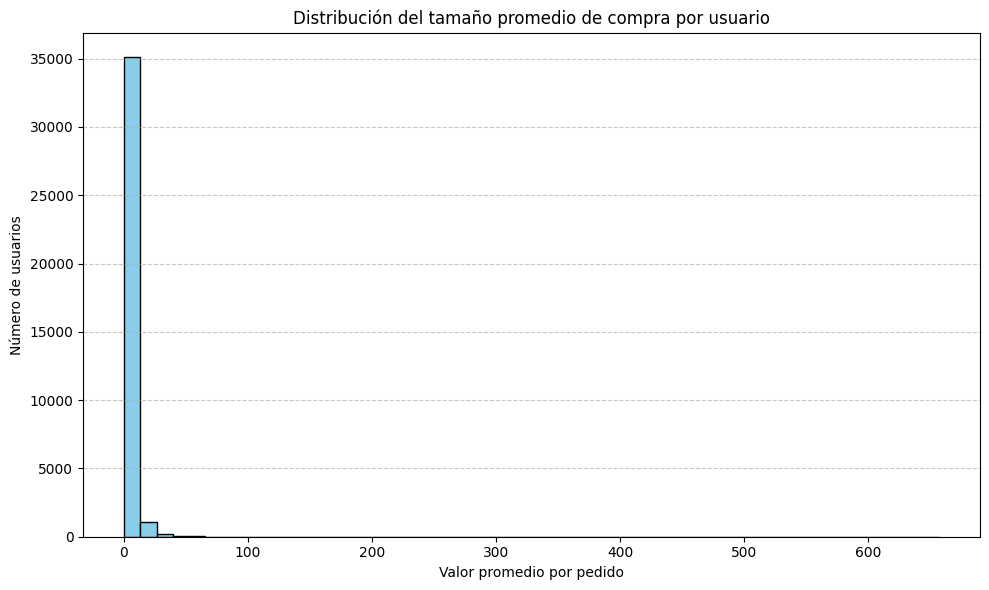

In [46]:
# Calcular tamaño promedio de compra por usuario
avg_order_size = orders.groupby('Uid')['Revenue'].mean().reset_index(name='avg_order_value')

# Mostrar estadísticas básicas
print(avg_order_size['avg_order_value'].describe())

# Graficar histograma del tamaño promedio de compra
plt.figure(figsize=(10,6))
plt.hist(avg_order_size['avg_order_value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución del tamaño promedio de compra por usuario')
plt.xlabel('Valor promedio por pedido')
plt.ylabel('Número de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

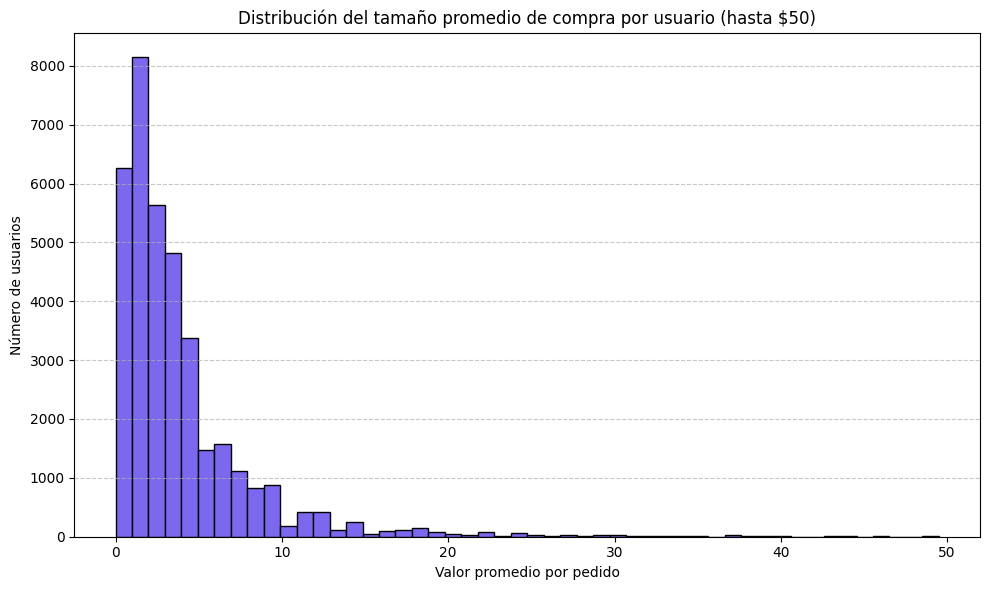

In [47]:
plt.figure(figsize=(10,6))

# Filtramos valores hasta 50 para una mejor visualización
filtered_avg_order = avg_order_size[avg_order_size['avg_order_value'] <= 50]

plt.hist(filtered_avg_order['avg_order_value'], bins=50, color='mediumslateblue', edgecolor='black')
plt.title('Distribución del tamaño promedio de compra por usuario (hasta $50)')
plt.xlabel('Valor promedio por pedido')
plt.ylabel('Número de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En general, el valor promedio que gastan los usuarios por pedido es bastante moderado, con una media alrededor de $4.09.

La mayoría de los usuarios hacen compras que rondan entre 1.28 y 4.89 ,lo que indica que muchos usuarios gastan montos pequeños o moderados en cada pedido.
Sin embargo, hay algunos usuarios que hacen compras mucho más grandes, con valores máximos que llegan hasta más de $650,
aunque estos casos son excepcionales y no representan a la mayoría.

Al limitar el gráfico a valores hasta $50, podemos ver con más claridad cómo se distribuyen los montos de compra más frecuentes,
y notar que la mayoría se concentra en rangos bajos y medianos.

## Cúanto dinero traen los usuarios? 

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: total_revenue, dtype: float64


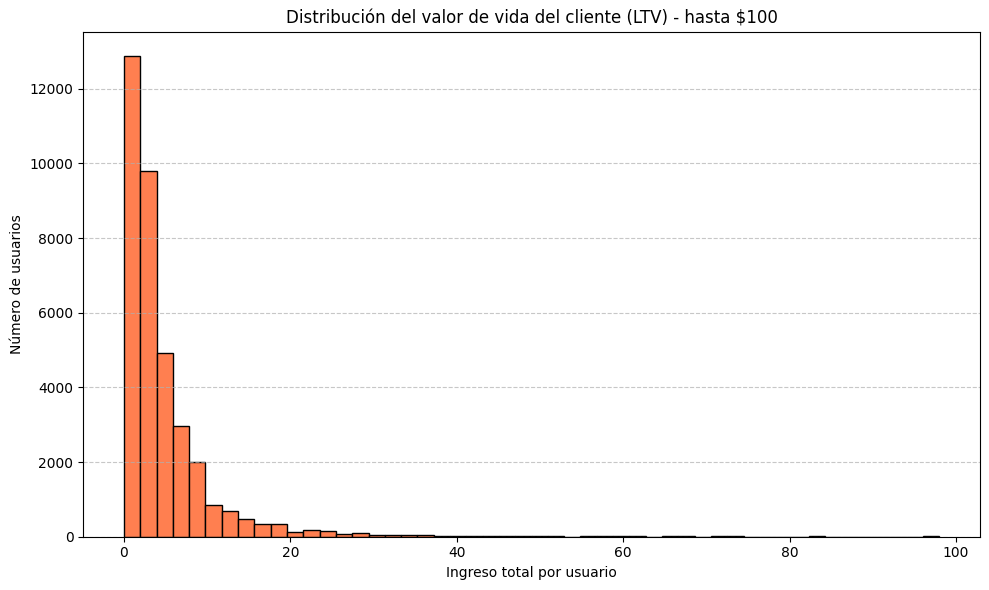

In [5]:
# Convertir 'Buy Ts' a datetime 
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
# Calcular LTV: ingreso total por usuario
ltv = orders.groupby('Uid')['Revenue'].sum().reset_index(name='total_revenue')

# Estadísticas descriptivas del LTV
print(ltv['total_revenue'].describe())

# Graficar distribución del LTV limitado a $100 para mejor visualización
plt.figure(figsize=(10,6))
filtered_ltv = ltv[ltv['total_revenue'] <= 100]

plt.hist(filtered_ltv['total_revenue'], bins=50, color='coral', edgecolor='black')
plt.title('Distribución del valor de vida del cliente (LTV) - hasta $100')
plt.xlabel('Ingreso total por usuario')
plt.ylabel('Número de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


En promedio, cada usuario aporta alrededor de 6.90 en ingresos durante el período analizado.
Sin embargo, la desviación estándar es bastante alta (88.13), lo que indica que hay usuarios que aportan muchísimo más dinero, aunque son excepcionales.
La mediana está en 3.05, lo que significa que la mitad de los usuarios aportan menos de ese monto.La mayoría de los usuarios genera ingresos relativamente bajos, con el 75% aportando menos de 5.80.
Algunos usuarios generan ingresos muy altos, con un máximo que supera los $11,800, pero estos casos son raros y no representan a la mayoría.
Al limitar el gráfico a usuarios con ingresos totales hasta 100, podemos observar mejor la distribución del LTV para la mayoría de los clientes.

# Marketing

In [6]:
# Total gastado en marketing
total_spent = costs['costs'].sum()
print(f"Total gastado en marketing: ${total_spent:.2f}")

# Gasto por fuente de adquisición
spent_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
print(spent_by_source)

Total gastado en marketing: $329131.62
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


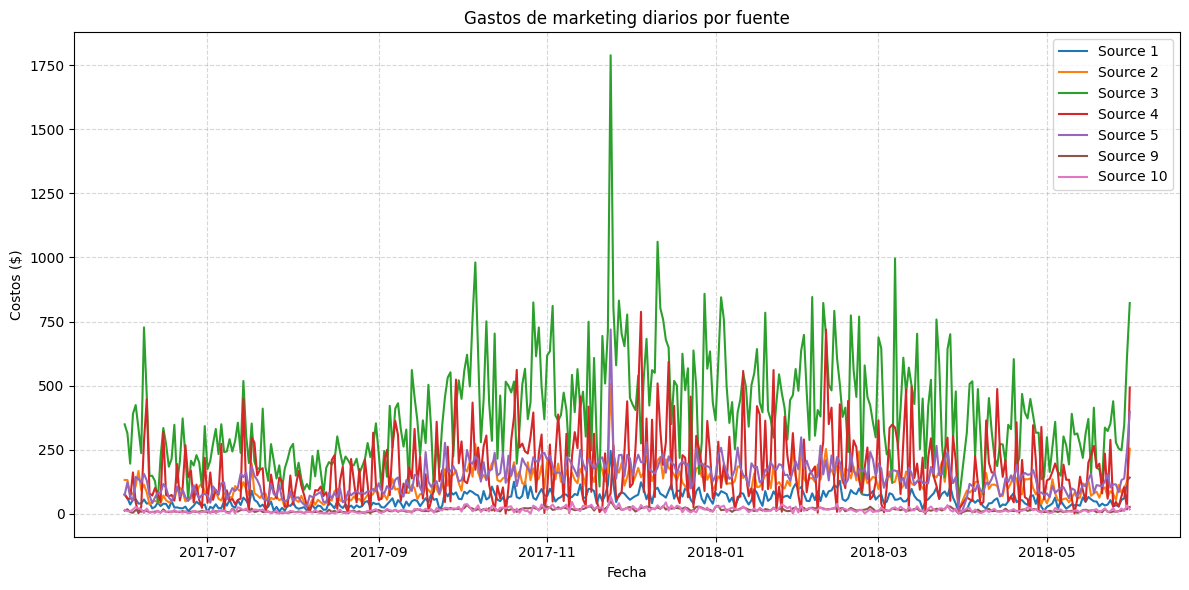

In [7]:
costs['dt'] = pd.to_datetime(costs['dt'])

plt.figure(figsize=(12,6))
for source in costs['source_id'].unique():
    subset = costs[costs['source_id'] == source]
    plt.plot(subset['dt'], subset['costs'], label=f'Source {source}')

plt.title('Gastos de marketing diarios por fuente')
plt.xlabel('Fecha')
plt.ylabel('Costos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Como tal aquí se dice que son gastos no de que pero si para ver de que se trata con el área de marketing 

In [8]:
# Contar visitas por source_id
visits_count = visits['Source Id'].value_counts().reset_index()
visits_count.columns = ['source_id', 'visits_count']

# Contar pedidos por source_id (uniendo visitas y pedidos)
orders_visits = pd.merge(orders, visits[['Uid', 'Source Id']], on='Uid', how='left')
orders_count = orders_visits['Source Id'].value_counts().reset_index()
orders_count.columns = ['source_id', 'orders_count']

print("Visitas por source_id:")
print(visits_count)

print("\nPedidos por source_id:")
print(orders_count)

Visitas por source_id:
   source_id  visits_count
0          4        101794
1          3         85610
2          5         66905
3          2         47626
4          1         34121
5          9         13277
6         10         10025
7          7            36
8          6             6

Pedidos por source_id:
   source_id  orders_count
0          1        248662
1          2        238297
2          5        151824
3          4         62683
4          3         46766
5          9          9547
6         10          4027
7          7             1


In [9]:
conversion_data = visits_count.merge(orders_count, on='source_id', how='left').fillna(0)
conversion_data['conversion_rate'] = conversion_data['orders_count'] / conversion_data['visits_count']

print(conversion_data) 

   source_id  visits_count  orders_count  conversion_rate
0          4        101794       62683.0         0.615783
1          3         85610       46766.0         0.546268
2          5         66905      151824.0         2.269247
3          2         47626      238297.0         5.003506
4          1         34121      248662.0         7.287653
5          9         13277        9547.0         0.719063
6         10         10025        4027.0         0.401696
7          7            36           1.0         0.027778
8          6             6           0.0         0.000000


In [11]:
# 1. Obtener la primera compra de cada usuario
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index()

# 2. Obtener la primera visita de cada usuario con su source_id
first_visit = visits.groupby('Uid').agg({'Start Ts':'min', 'Source Id':'first'}).reset_index()

# 3. Unir primera compra y primera visita
first_user_data = pd.merge(first_order, first_visit, on='Uid', how='inner')

# 4. Filtrar para asegurarnos que la compra ocurrió después de la visita
first_user_data = first_user_data[first_user_data['Buy Ts'] >= first_user_data['Start Ts']]

# 5. Contar nuevos clientes por fuente
new_customers_by_source = first_user_data.groupby('Source Id')['Uid'].nunique().reset_index(name='new_customers')

# 6. Total gastado por fuente (ya lo tienes)
spent_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

# 7. Combinar y calcular CAC
cac_data = pd.merge(spent_by_source, new_customers_by_source, left_on='source_id', right_on='Source Id', how='left')
cac_data['new_customers'] = cac_data['new_customers'].fillna(0)
cac_data['CAC'] = cac_data.apply(lambda row: row['costs']/row['new_customers'] if row['new_customers']>0 else None, axis=1)

print(cac_data[['source_id', 'costs', 'new_customers', 'CAC']])

   source_id      costs  new_customers        CAC
0          1   20833.27           3743   5.565928
1          2   42806.04           4323   9.901929
2          3  141321.63           9138  15.465269
3          4   61073.60           9823   6.217408
4          5   51757.10           6839   7.567934
5          9    5517.49           1415   3.899286
6         10    5822.49           1241   4.691773


In [12]:
# Unimos visitas y pedidos
summary = visits_count.merge(orders_count, on='source_id', how='left').fillna(0)

# Calculamos tasa de conversión
summary['conversion_rate'] = summary['orders_count'] / summary['visits_count']

# Unimos CAC
summary = summary.merge(cac_data[['source_id', 'CAC']], on='source_id', how='left')

print(summary)

   source_id  visits_count  orders_count  conversion_rate        CAC
0          4        101794       62683.0         0.615783   6.217408
1          3         85610       46766.0         0.546268  15.465269
2          5         66905      151824.0         2.269247   7.567934
3          2         47626      238297.0         5.003506   9.901929
4          1         34121      248662.0         7.287653   5.565928
5          9         13277        9547.0         0.719063   3.899286
6         10         10025        4027.0         0.401696   4.691773
7          7            36           1.0         0.027778        NaN
8          6             6           0.0         0.000000        NaN


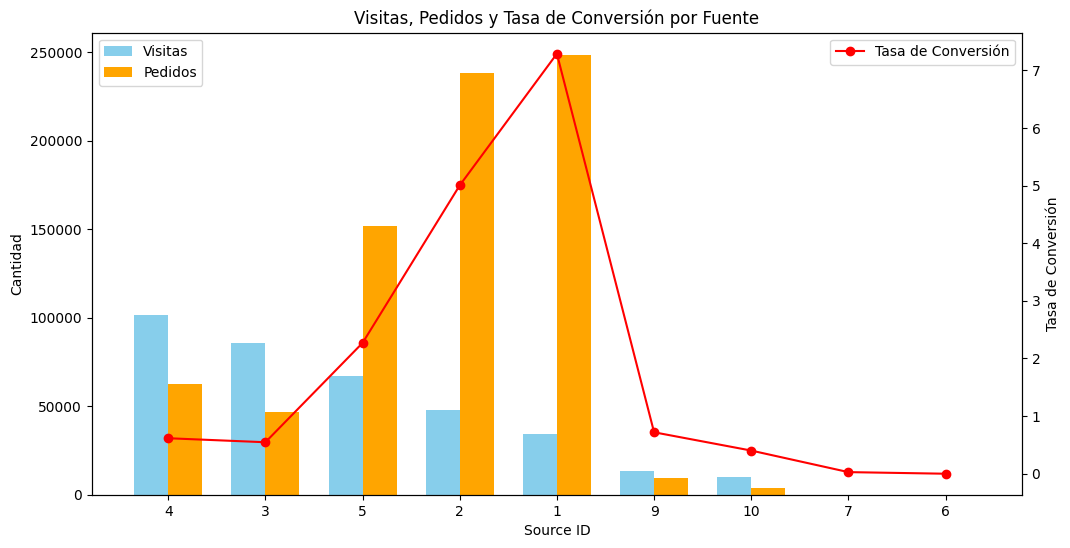

In [13]:
fig, ax1 = plt.subplots(figsize=(12,6))

x = np.arange(len(summary['source_id']))

width = 0.35

ax1.bar(x - width/2, summary['visits_count'], width, label='Visitas', color='skyblue')
ax1.bar(x + width/2, summary['orders_count'], width, label='Pedidos', color='orange')

ax1.set_xlabel('Source ID')
ax1.set_ylabel('Cantidad')
ax1.set_xticks(x)
ax1.set_xticklabels(summary['source_id'])
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, summary['conversion_rate'], color='red', marker='o', label='Tasa de Conversión')
ax2.set_ylabel('Tasa de Conversión')
ax2.legend(loc='upper right')

plt.title('Visitas, Pedidos y Tasa de Conversión por Fuente')
plt.show()


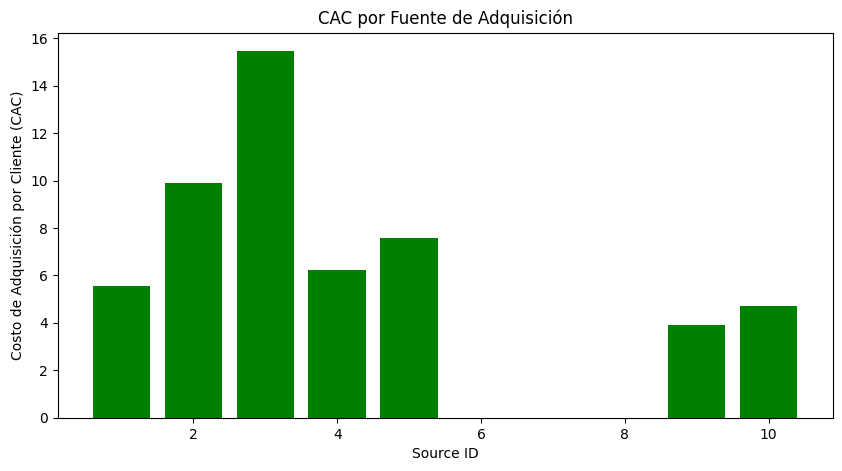

In [14]:
plt.figure(figsize=(10,5))
plt.bar(summary['source_id'], summary['CAC'], color='green')
plt.xlabel('Source ID')
plt.ylabel('Costo de Adquisición por Cliente (CAC)')
plt.title('CAC por Fuente de Adquisición')
plt.show() 

Visitas y pedidos:
Pues resulta que tener muchos visitantes no siempre significa tener muchas ventas. Algunas fuentes traen montones de gente, pero pocos compran. Así que no es sólo cuestión de tráfico, sino de calidad.

Tasa de conversión:
Calculamos cuántos de los visitantes realmente hicieron una compra, y vimos que algunas fuentes convierten mejor que otras. O sea, algunas traen visitantes que están más listos para comprar.

Costo de adquisición (CAC):
El dinero que se gasta para conseguir un cliente cambia mucho según la fuente. Hay fuentes que te cobran menos por cada cliente nuevo y otras que son carísimas.

Lo ideal es poner más plata donde te sale barato conseguir clientes que además compran, y pensar bien si vale la pena seguir gastando en las fuentes que cuestan mucho y traen pocas ventas.

In [15]:
# Ingresos totales por fuente de adquisición
revenue_by_source = orders.merge(visits[['Uid', 'Source Id']], on='Uid', how='left')
revenue_by_source = revenue_by_source.groupby('Source Id')['Revenue'].sum().reset_index()

# Unimos con los costos
roi_data = revenue_by_source.merge(costs.groupby('source_id')['costs'].sum().reset_index(),
                                  left_on='Source Id', right_on='source_id', how='left')

# Calculamos ROMI
roi_data['ROMI'] = (roi_data['Revenue'] - roi_data['costs']) / roi_data['costs']

print(roi_data[['source_id', 'Revenue', 'costs', 'ROMI']])

   source_id       Revenue      costs        ROMI
0        1.0  2.298200e+06   20833.27  109.313944
1        2.0  2.638189e+06   42806.04   60.631237
2        3.0  2.966880e+05  141321.63    1.099381
3        4.0  4.966902e+05   61073.60    7.132649
4        5.0  1.181477e+06   51757.10   21.827344
5        NaN  1.220000e+00        NaN         NaN
6        9.0  3.634225e+04    5517.49    5.586736
7       10.0  1.461923e+04    5822.49    1.510821


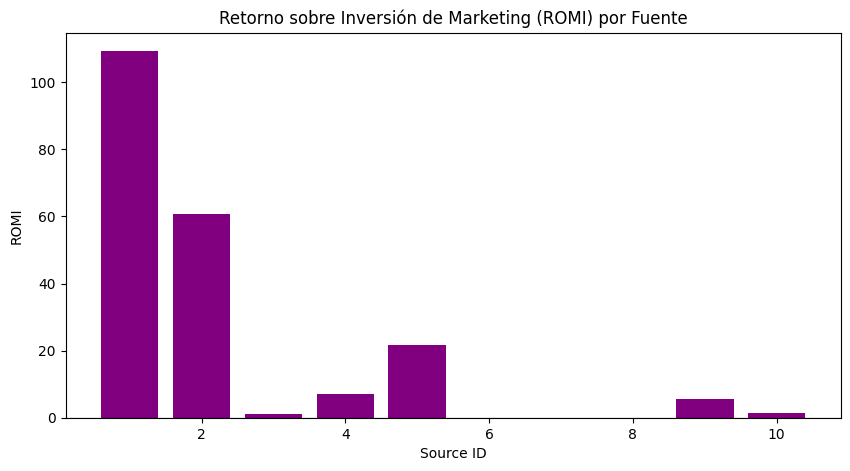

In [16]:
plt.figure(figsize=(10,5))
plt.bar(roi_data['source_id'], roi_data['ROMI'], color='purple')
plt.xlabel('Source ID')
plt.ylabel('ROMI')
plt.title('Retorno sobre Inversión de Marketing (ROMI) por Fuente')
plt.axhline(0, color='black', linewidth=0.8)  # Línea base en 0 para ver ganancias/pérdidas
plt.show()

En esta gráfica pues es mas contundente la información en el canal 1 y 2 son los mejores así que sería de confiar más en este y el 5 loo demás es minimo el retorno de la inversion que se hace. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo hasta este punto! Calculaste muy bien las métricas de negocio y las explicas correctamente con las gráficas y tus comentarios lo cual deja claro el mensaje que se quiere compartir sin importar si la audiencia a la que expongas tus resultados sea técnica o no.
</div>

# Conclusión de marketing

Después de revisar todo el análisis de marketing, incluyendo cuánto se gastó, cuántos clientes nuevos llegaron desde cada fuente, cuánto costó adquirirlos y qué tan rentables fueron, se pueden sacar varias conclusiones claras.

Aunque hay diferencias importantes entre las fuentes, lo interesante es que no se trata solo de cuánto se invierte, sino de cuánto se recupera por cada peso que se mete en publicidad. Algunas fuentes pueden parecer más caras al principio, pero si traen buenos ingresos, terminan valiendo la pena.

En este caso, al ver las métricas y sobre todo el gráfico del retorno de inversión, queda claro que las fuentes 1, 2 y 5 son las que más aportaron al negocio. Estas fuentes no solo trajeron una buena cantidad de usuarios, sino que también generaron un buen retorno, lo cual justifica que se les siga destinando presupuesto.

Así que, si hablamos de en qué vale la pena invertir más, estas tres fuentes son las principales candidatas. No necesariamente son las más baratas en costo por cliente, pero el retorno que generan es sólido. Las demás fuentes pueden seguir usándose, pero convendría optimizarlas o revisar si realmente están funcionando como se espera.

En resumen, la recomendación sería continuar invirtiendo en las fuentes 1, 2 y 5, ya que son las que mejor están funcionando en términos de resultados concretos, sin dejar de lado un monitoreo constante para ajustar campañas si fuera necesario. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un muy buen análisis de este proyecto, te felicito!

Siempre este tipo de análisis que son un poco más complejos hay que buscar cómo explicarlos de manera sencilla considerando la audiencia a la cual se va a presentar los resultados y es ahí donde las visualizaciones juegan un papel muy importante ya que con una visualización es mucho más fácil entender la explicación que con solo valores numéricos.

Muy buen trabajo, saludos!
</div>